In [79]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
sns.set()
from sklearn.decomposition import PCA

from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

In [80]:
wine_data = pd.read_csv("wine.csv")
wine_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [81]:
wine_data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [82]:
X = wine_data.iloc[:, 0:13].values
y = wine_data.iloc[:, 13].values
wine_data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [83]:
wine_data.tail()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [84]:
wine_data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [85]:
wine = wine_data.drop(['Type'],axis =1)
wine.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [86]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


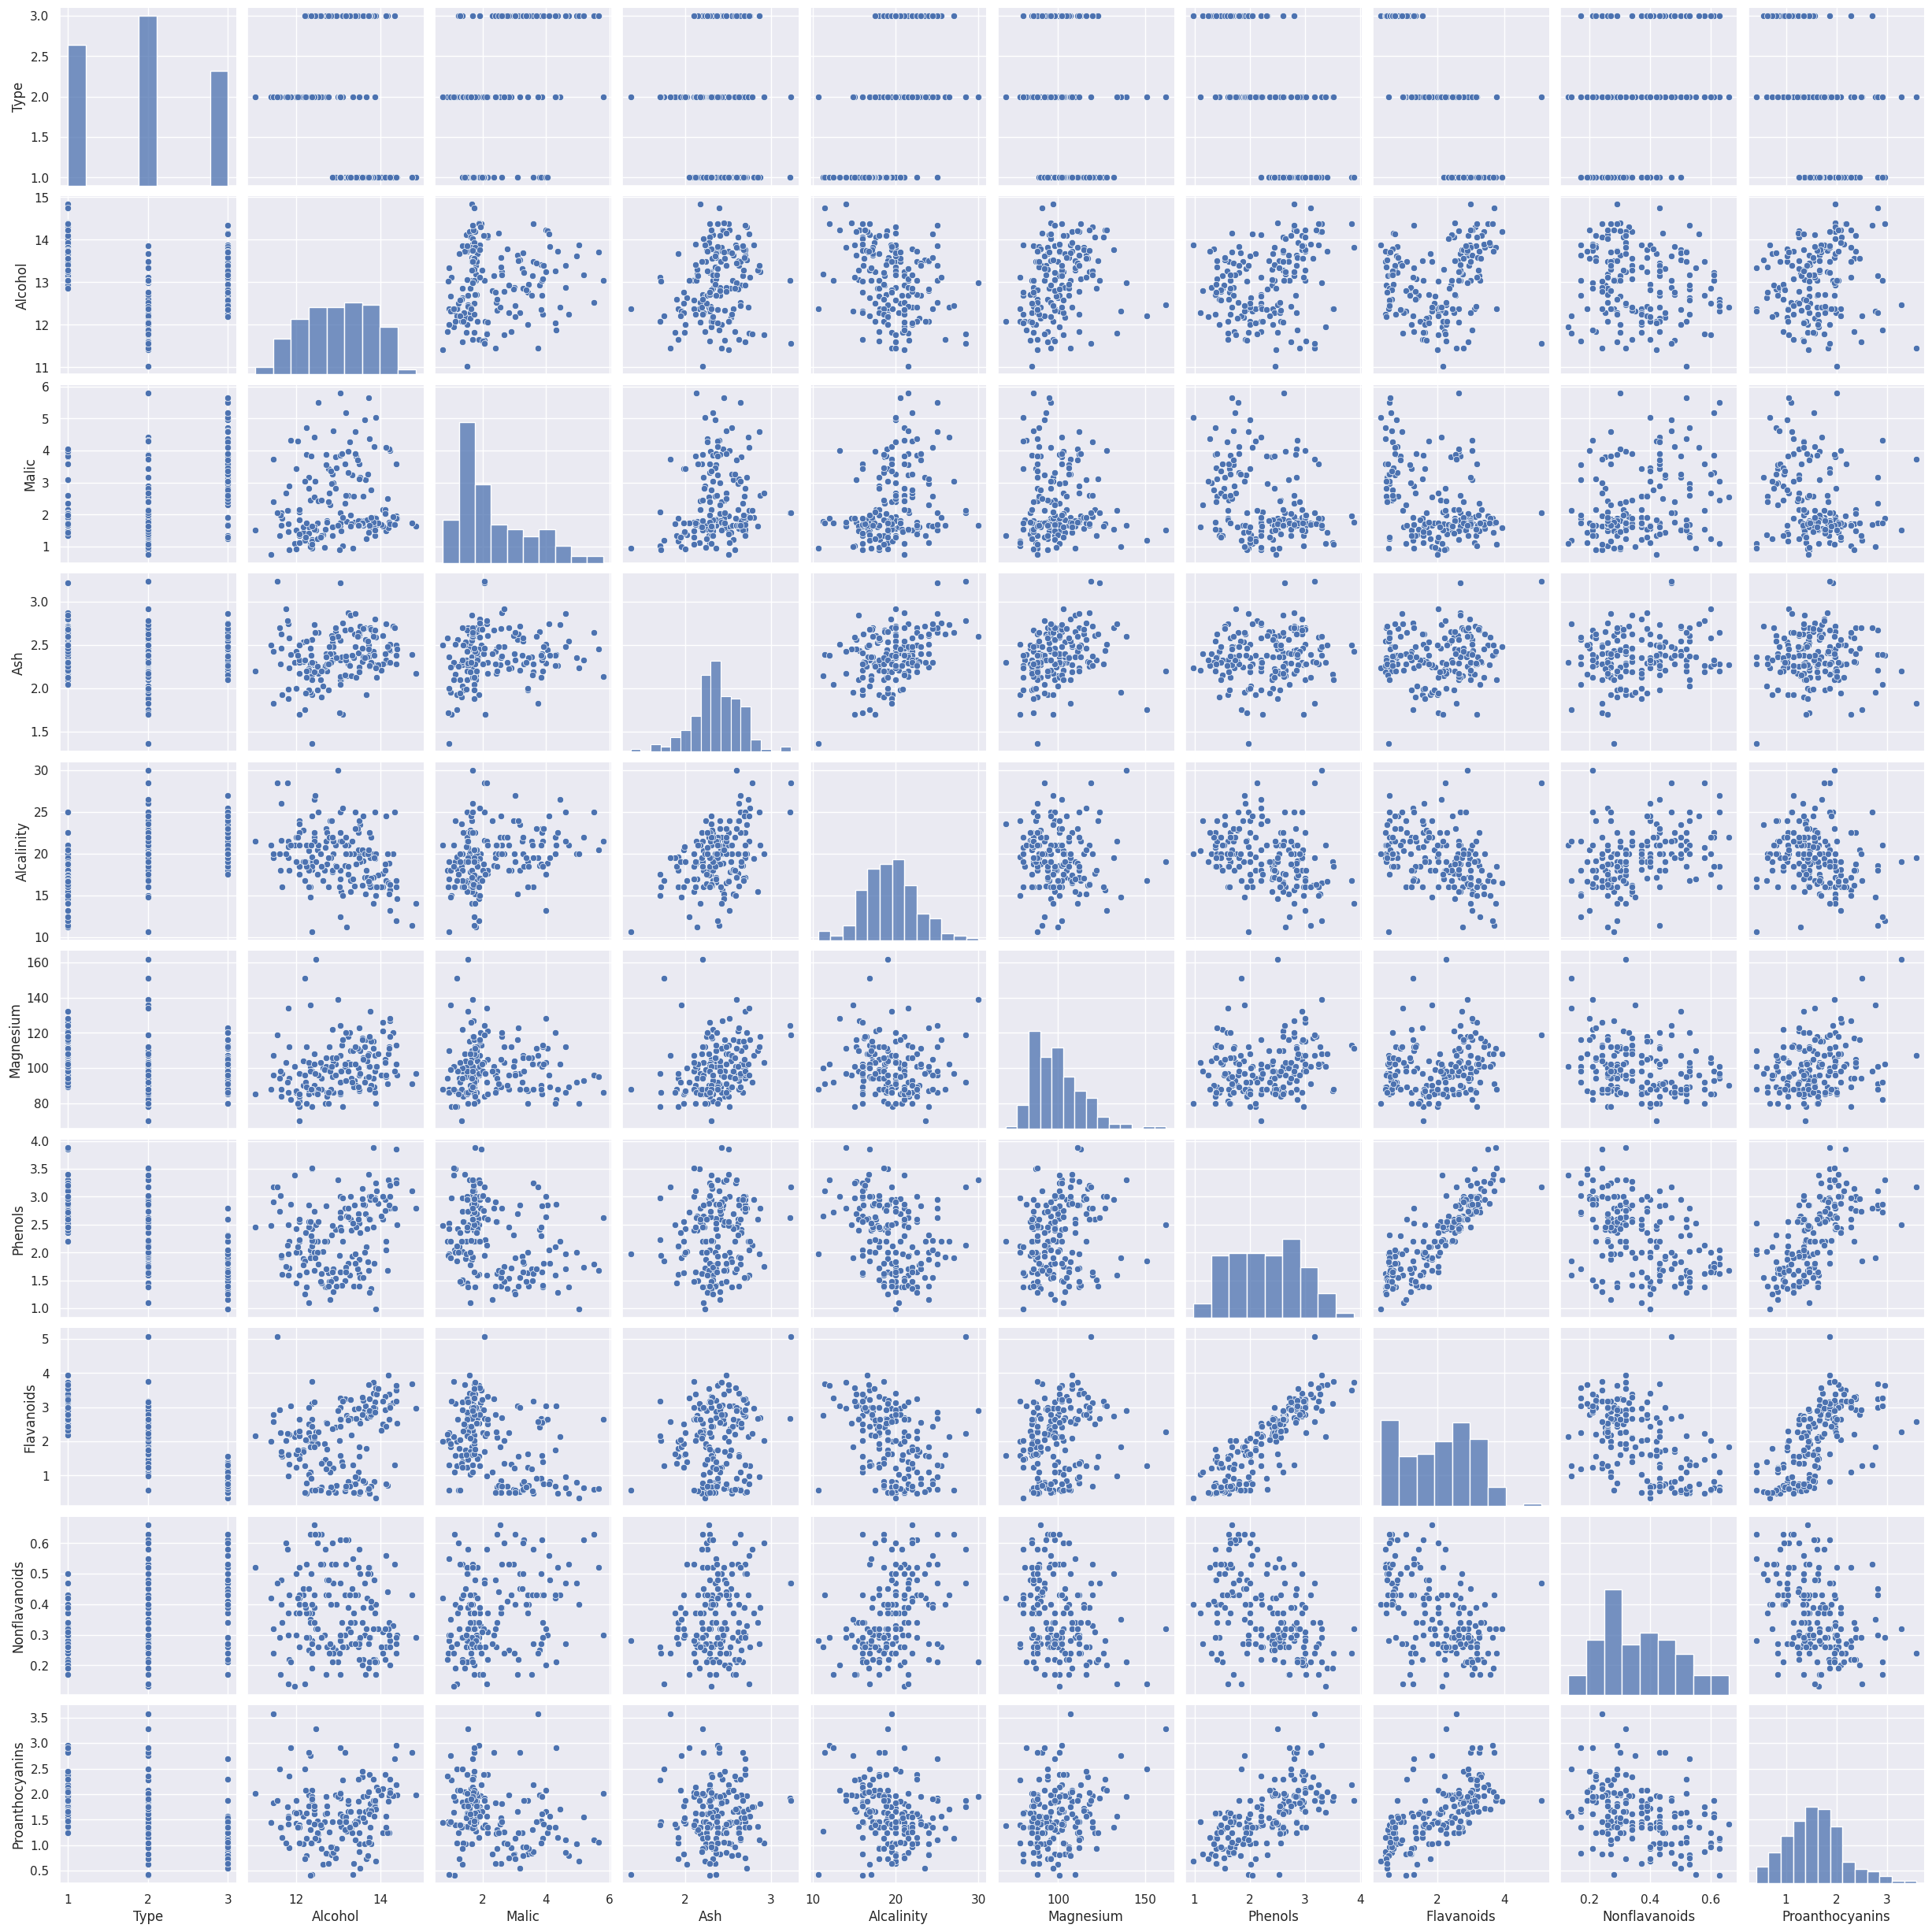

In [87]:
sns.pairplot(wine_data.iloc[:,0:10])

In [88]:

def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
wine_norm = norm_func(wine_data.iloc[:,1:])
print(wine_norm)

      Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  \
0    0.842105  0.191700  0.572193    0.257732   0.619565  0.627586   
1    0.571053  0.205534  0.417112    0.030928   0.326087  0.575862   
2    0.560526  0.320158  0.700535    0.412371   0.336957  0.627586   
3    0.878947  0.239130  0.609626    0.319588   0.467391  0.989655   
4    0.581579  0.365613  0.807487    0.536082   0.521739  0.627586   
..        ...       ...       ...         ...        ...       ...   
173  0.705263  0.970356  0.582888    0.510309   0.271739  0.241379   
174  0.623684  0.626482  0.598930    0.639175   0.347826  0.282759   
175  0.589474  0.699605  0.481283    0.484536   0.543478  0.210345   
176  0.563158  0.365613  0.540107    0.484536   0.543478  0.231034   
177  0.815789  0.664032  0.737968    0.716495   0.282609  0.368966   

     Flavanoids  Nonflavanoids  Proanthocyanins     Color       Hue  Dilution  \
0      0.573840       0.283019         0.593060  0.372014  0.455285  0.970696 

In [89]:
std = StandardScaler()
std = StandardScaler().fit_transform(wine)
std.shape

(178, 13)

In [90]:
print(std)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


In [91]:
pca = PCA(random_state=14,n_components=3)
pca_components = pca.fit_transform(wine_norm)

In [92]:
print(pca_components)

[[-7.06335756e-01 -2.53192753e-01  2.40926932e-02]
 [-4.84976802e-01 -8.82289142e-03 -2.80482048e-01]
 [-5.21172266e-01 -1.89187222e-01  1.96216736e-01]
 [-8.21643663e-01 -5.80905512e-01  8.11097172e-02]
 [-2.02546382e-01 -5.94665740e-02  3.00239941e-01]
 [-6.08190152e-01 -4.87519191e-01 -7.54332321e-02]
 [-5.44047399e-01 -3.00196497e-01 -1.05074621e-01]
 [-4.74357495e-01 -2.98197021e-01 -2.82149308e-03]
 [-5.00432012e-01 -3.07602859e-01 -2.30493613e-01]
 [-6.27517969e-01 -2.06328233e-01 -1.14147932e-01]
 [-7.27467157e-01 -3.56512044e-01 -5.04199490e-02]
 [-3.74967744e-01 -2.25424535e-01 -2.86134083e-01]
 [-4.48188283e-01 -2.31938139e-01 -1.67908053e-01]
 [-6.26345329e-01 -3.55138677e-01 -8.58356579e-02]
 [-8.35717011e-01 -5.38047802e-01 -1.15202943e-01]
 [-4.71931568e-01 -3.37405385e-01 -7.27821607e-02]
 [-4.26990905e-01 -4.50842684e-01  5.44365527e-02]
 [-3.66595704e-01 -3.15750341e-01  5.36790513e-02]
 [-7.18788533e-01 -5.93881332e-01 -9.66475568e-02]
 [-4.58884986e-01 -1.75782240e-

In [93]:
pca.explained_variance_

array([0.2200922 , 0.10246084, 0.04624247])

In [94]:
var = pca.explained_variance_ratio_
var

array([0.40749485, 0.18970352, 0.08561671])

In [95]:
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([40.75, 59.72, 68.28])

In [96]:
pca.components_

array([[-0.13336766,  0.24851581, -0.00073917,  0.17783862, -0.08865728,
        -0.39507087, -0.41458979,  0.33310861, -0.2529021 ,  0.09232904,
        -0.25113726, -0.4734921 , -0.28686211],
       [-0.55088368, -0.22739058, -0.1630912 ,  0.07977633, -0.18816566,
        -0.07414473, -0.00100692, -0.00996037, -0.03141788, -0.5197075 ,
         0.23720622,  0.21556225, -0.44388836],
       [-0.08384838,  0.49203927,  0.40300937,  0.47724241,  0.0065507 ,
         0.25306514,  0.19610546,  0.28598186,  0.22834235, -0.03309997,
        -0.10658878,  0.29777629, -0.15196829]])

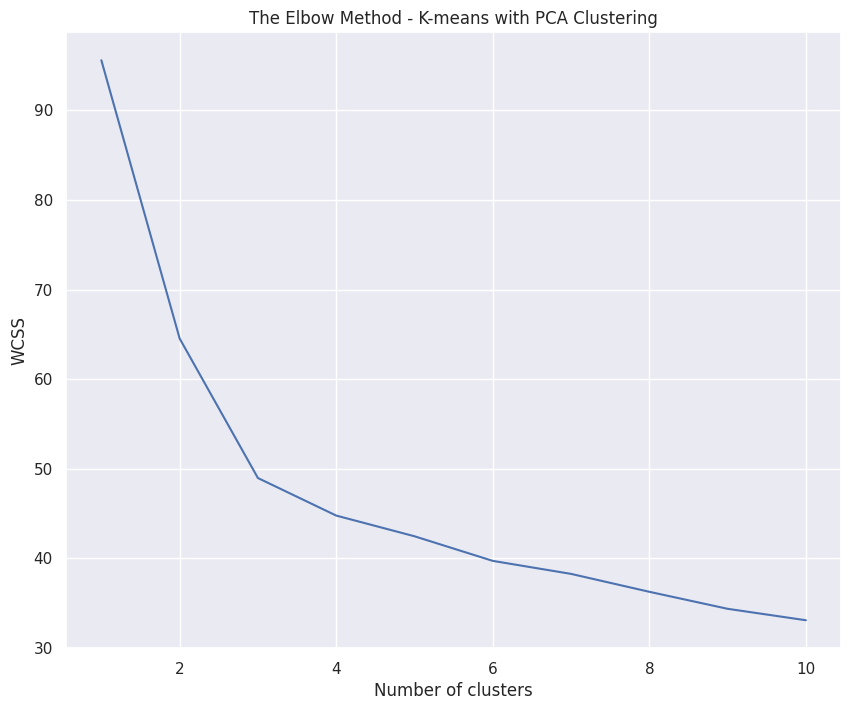

In [97]:
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(wine_norm)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method - K-means with PCA Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [98]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(wine_norm)

y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [99]:
wine_data.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

Text(0, 0.5, 'Second Principal Component')

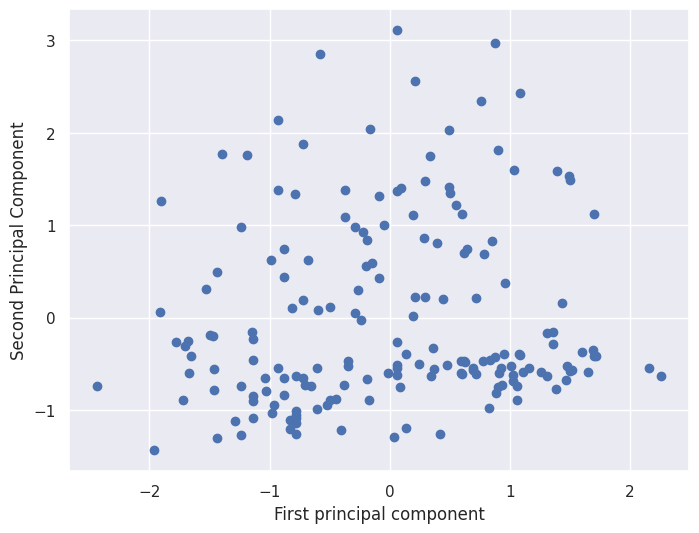

In [100]:
plt.figure(figsize=(8,6))
plt.scatter(std[:,0], std[:,1], cmap='tab10')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [101]:
pca_kmeans =pd.concat([wine.reset_index(drop = True), pd.DataFrame(wine_norm)], axis= 1)
pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
pca_kmeans['Segment Kmeans PCA'] = y_kmeans
print(pca_kmeans)

     Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0      14.23   1.71  2.43        15.6        127     2.80        3.06   
1      13.20   1.78  2.14        11.2        100     2.65        2.76   
2      13.16   2.36  2.67        18.6        101     2.80        3.24   
3      14.37   1.95  2.50        16.8        113     3.85        3.49   
4      13.24   2.59  2.87        21.0        118     2.80        2.69   
..       ...    ...   ...         ...        ...      ...         ...   
173    13.71   5.65  2.45        20.5         95     1.68        0.61   
174    13.40   3.91  2.48        23.0        102     1.80        0.75   
175    13.27   4.28  2.26        20.0        120     1.59        0.69   
176    13.17   2.59  2.37        20.0        120     1.65        0.68   
177    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color  ...  Magnesium   Phenols  \
0             0.28             2.29   5.64  ...   0

In [102]:
pca_kmeans['Segment'] = pca_kmeans['Segment Kmeans PCA'].map({0:'First', 1:'Second', 2:'Third'})

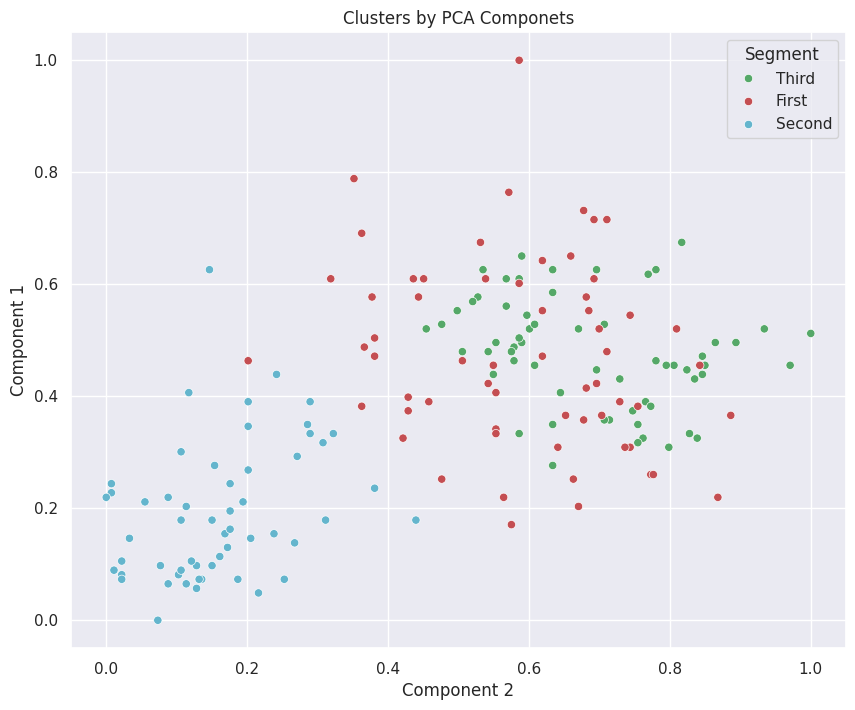

In [103]:
x_axis = pca_kmeans['Component 2']
y_axis = pca_kmeans['Component 1']
plt.figure(figsize= (10,8))
sns.scatterplot(data=pca_kmeans, x="Component 2", y="Component 1", hue="Segment", palette=['g', 'r','c'])
plt.title('Clusters by PCA Componets')
plt.show()

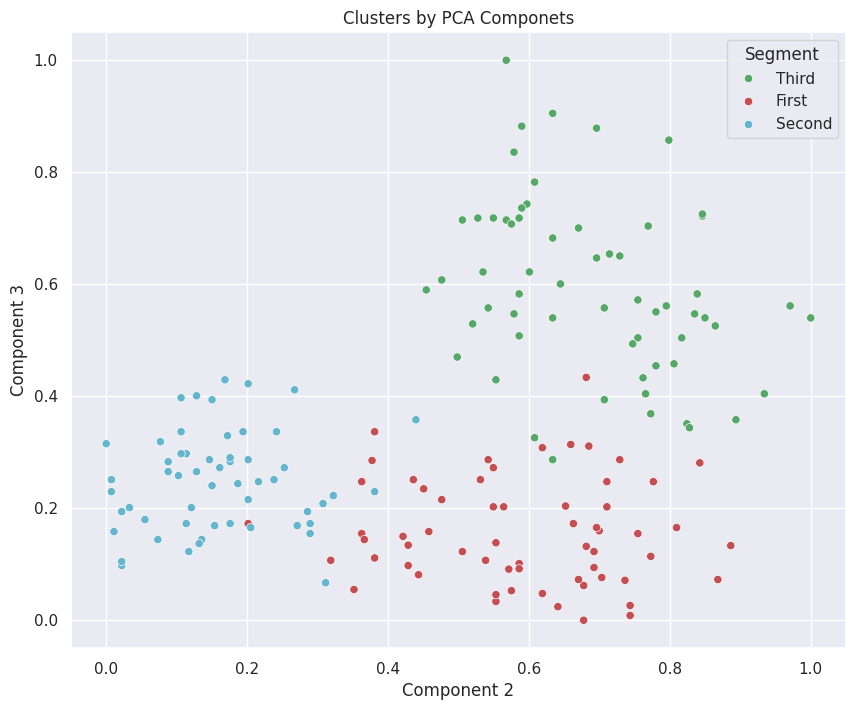

In [104]:
x_axis = pca_kmeans['Component 2']
y_axis = pca_kmeans['Component 3']
plt.figure(figsize= (10,8))
sns.scatterplot(data=pca_kmeans, x='Component 2', y='Component 3', hue='Segment', palette=['g', 'r','c'])
plt.title('Clusters by PCA Componets')
plt.show()

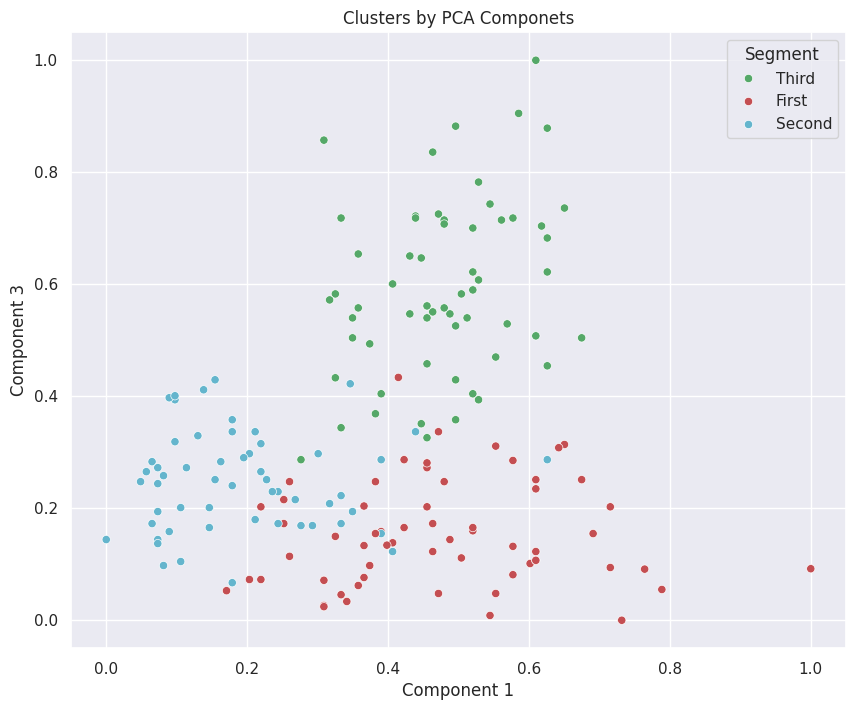

In [105]:
x_axis = pca_kmeans['Component 1']
y_axis = pca_kmeans['Component 3']
plt.figure(figsize= (10,8))
sns.scatterplot(data=pca_kmeans, x="Component 1", y="Component 3", hue="Segment", palette=['g', 'r','c'])
plt.title('Clusters by PCA Componets')
plt.show()

In [106]:
print(pca_components)

[[-7.06335756e-01 -2.53192753e-01  2.40926932e-02]
 [-4.84976802e-01 -8.82289142e-03 -2.80482048e-01]
 [-5.21172266e-01 -1.89187222e-01  1.96216736e-01]
 [-8.21643663e-01 -5.80905512e-01  8.11097172e-02]
 [-2.02546382e-01 -5.94665740e-02  3.00239941e-01]
 [-6.08190152e-01 -4.87519191e-01 -7.54332321e-02]
 [-5.44047399e-01 -3.00196497e-01 -1.05074621e-01]
 [-4.74357495e-01 -2.98197021e-01 -2.82149308e-03]
 [-5.00432012e-01 -3.07602859e-01 -2.30493613e-01]
 [-6.27517969e-01 -2.06328233e-01 -1.14147932e-01]
 [-7.27467157e-01 -3.56512044e-01 -5.04199490e-02]
 [-3.74967744e-01 -2.25424535e-01 -2.86134083e-01]
 [-4.48188283e-01 -2.31938139e-01 -1.67908053e-01]
 [-6.26345329e-01 -3.55138677e-01 -8.58356579e-02]
 [-8.35717011e-01 -5.38047802e-01 -1.15202943e-01]
 [-4.71931568e-01 -3.37405385e-01 -7.27821607e-02]
 [-4.26990905e-01 -4.50842684e-01  5.44365527e-02]
 [-3.66595704e-01 -3.15750341e-01  5.36790513e-02]
 [-7.18788533e-01 -5.93881332e-01 -9.66475568e-02]
 [-4.58884986e-01 -1.75782240e-

In [107]:
pca_components.shape

(178, 3)

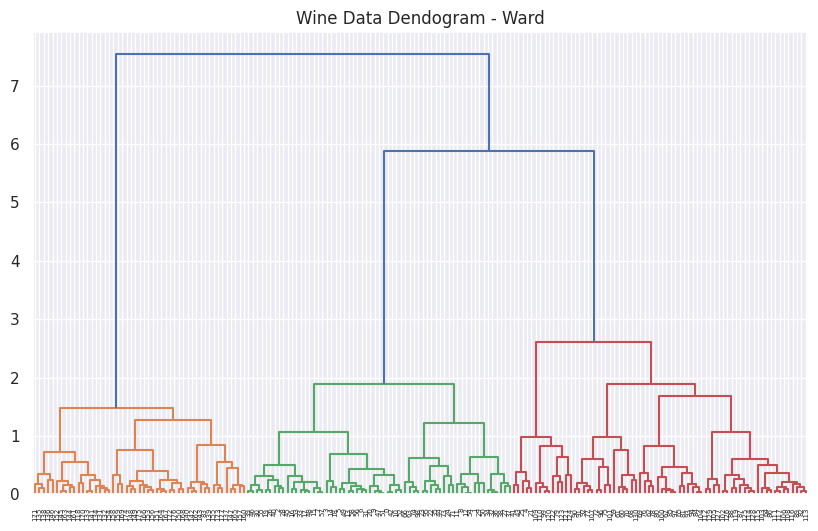

In [108]:
plt.figure(figsize=(10, 6))
plt.title("Wine Data Dendogram - Ward")
dend = sch.dendrogram(sch.linkage(pca_components, method='ward'))

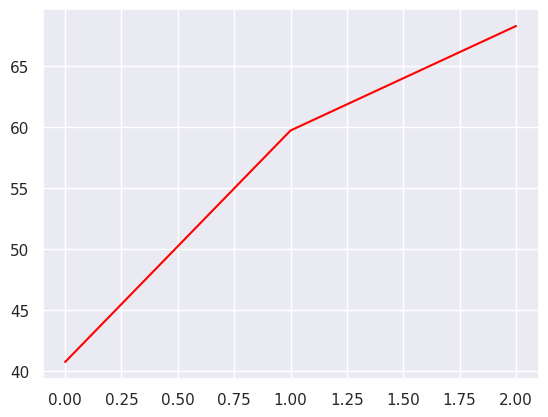

In [109]:
plt.plot(var1,color = 'red')

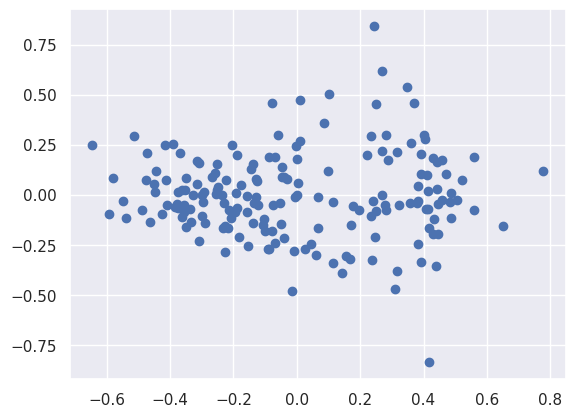

In [110]:
x = pca_components[:,0]
y = pca_components[:,1]
z = pca_components[:,2]
plt.scatter(y,z)

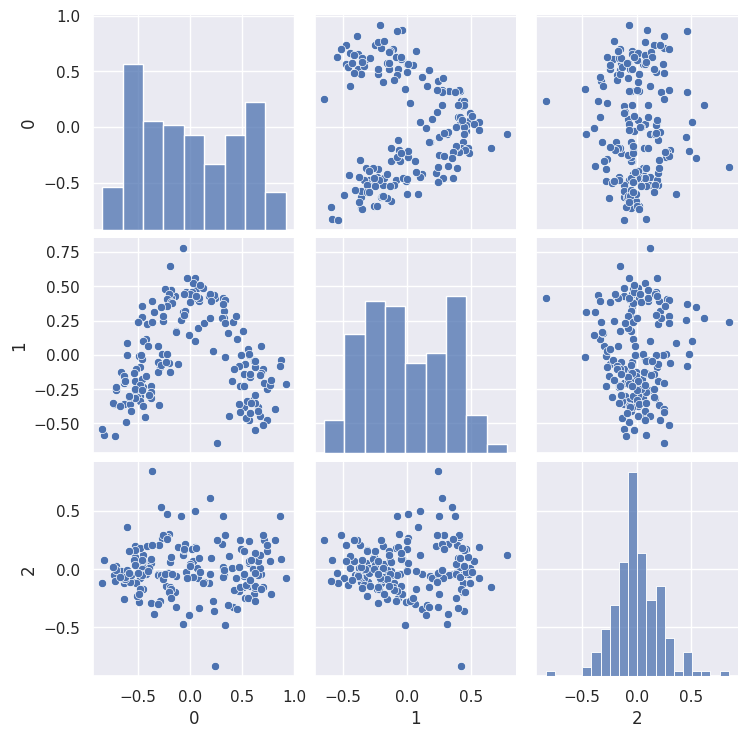

In [111]:
sns.pairplot(pd.DataFrame(pca_components))

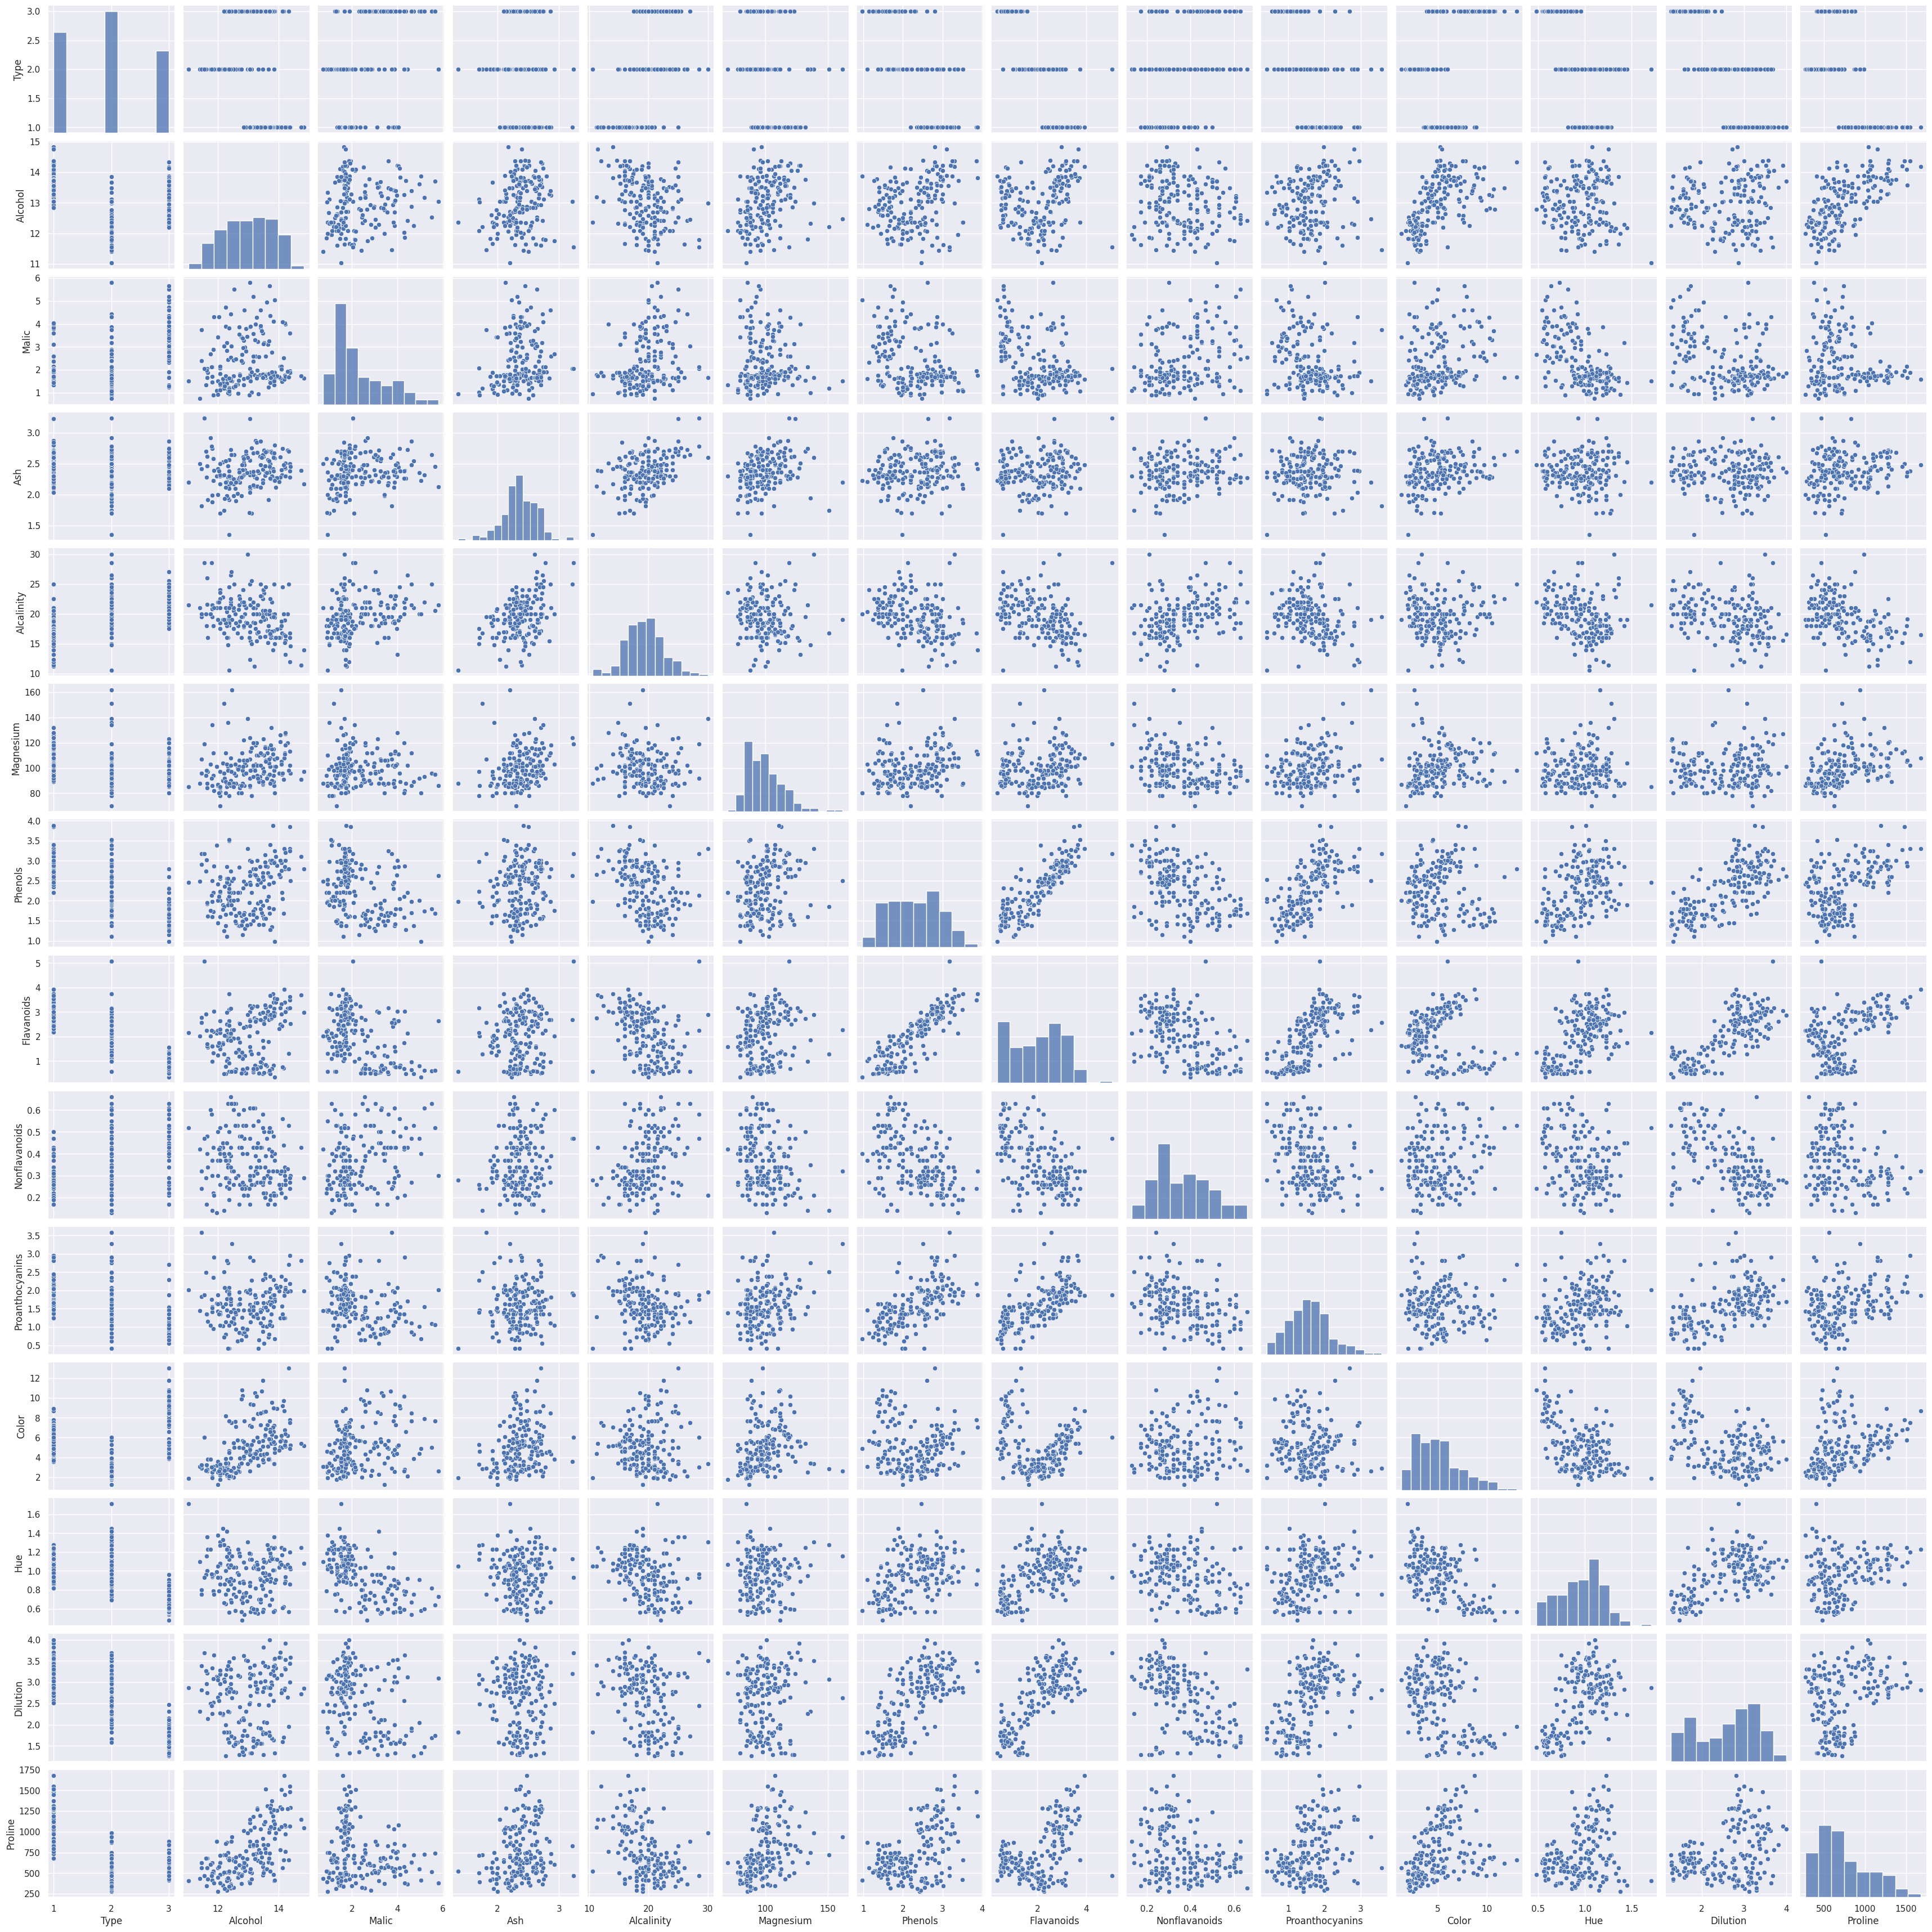

In [78]:
sns.pairplot(wine_data)

In [112]:
finalDf=pd.concat([pd.DataFrame(pca_components[:,0:2],columns=['pc1','pc2']),wine_data],axis=1)
finalDf

,pc1,pc2,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-0.706336,-0.253193,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,-0.484977,-0.008823,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,-0.521172,-0.189187,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,-0.821644,-0.580906,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,-0.202546,-0.059467,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.739510,-0.471901,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,0.581781,-0.348366,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,0.626313,-0.546857,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,0.572991,-0.425516,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


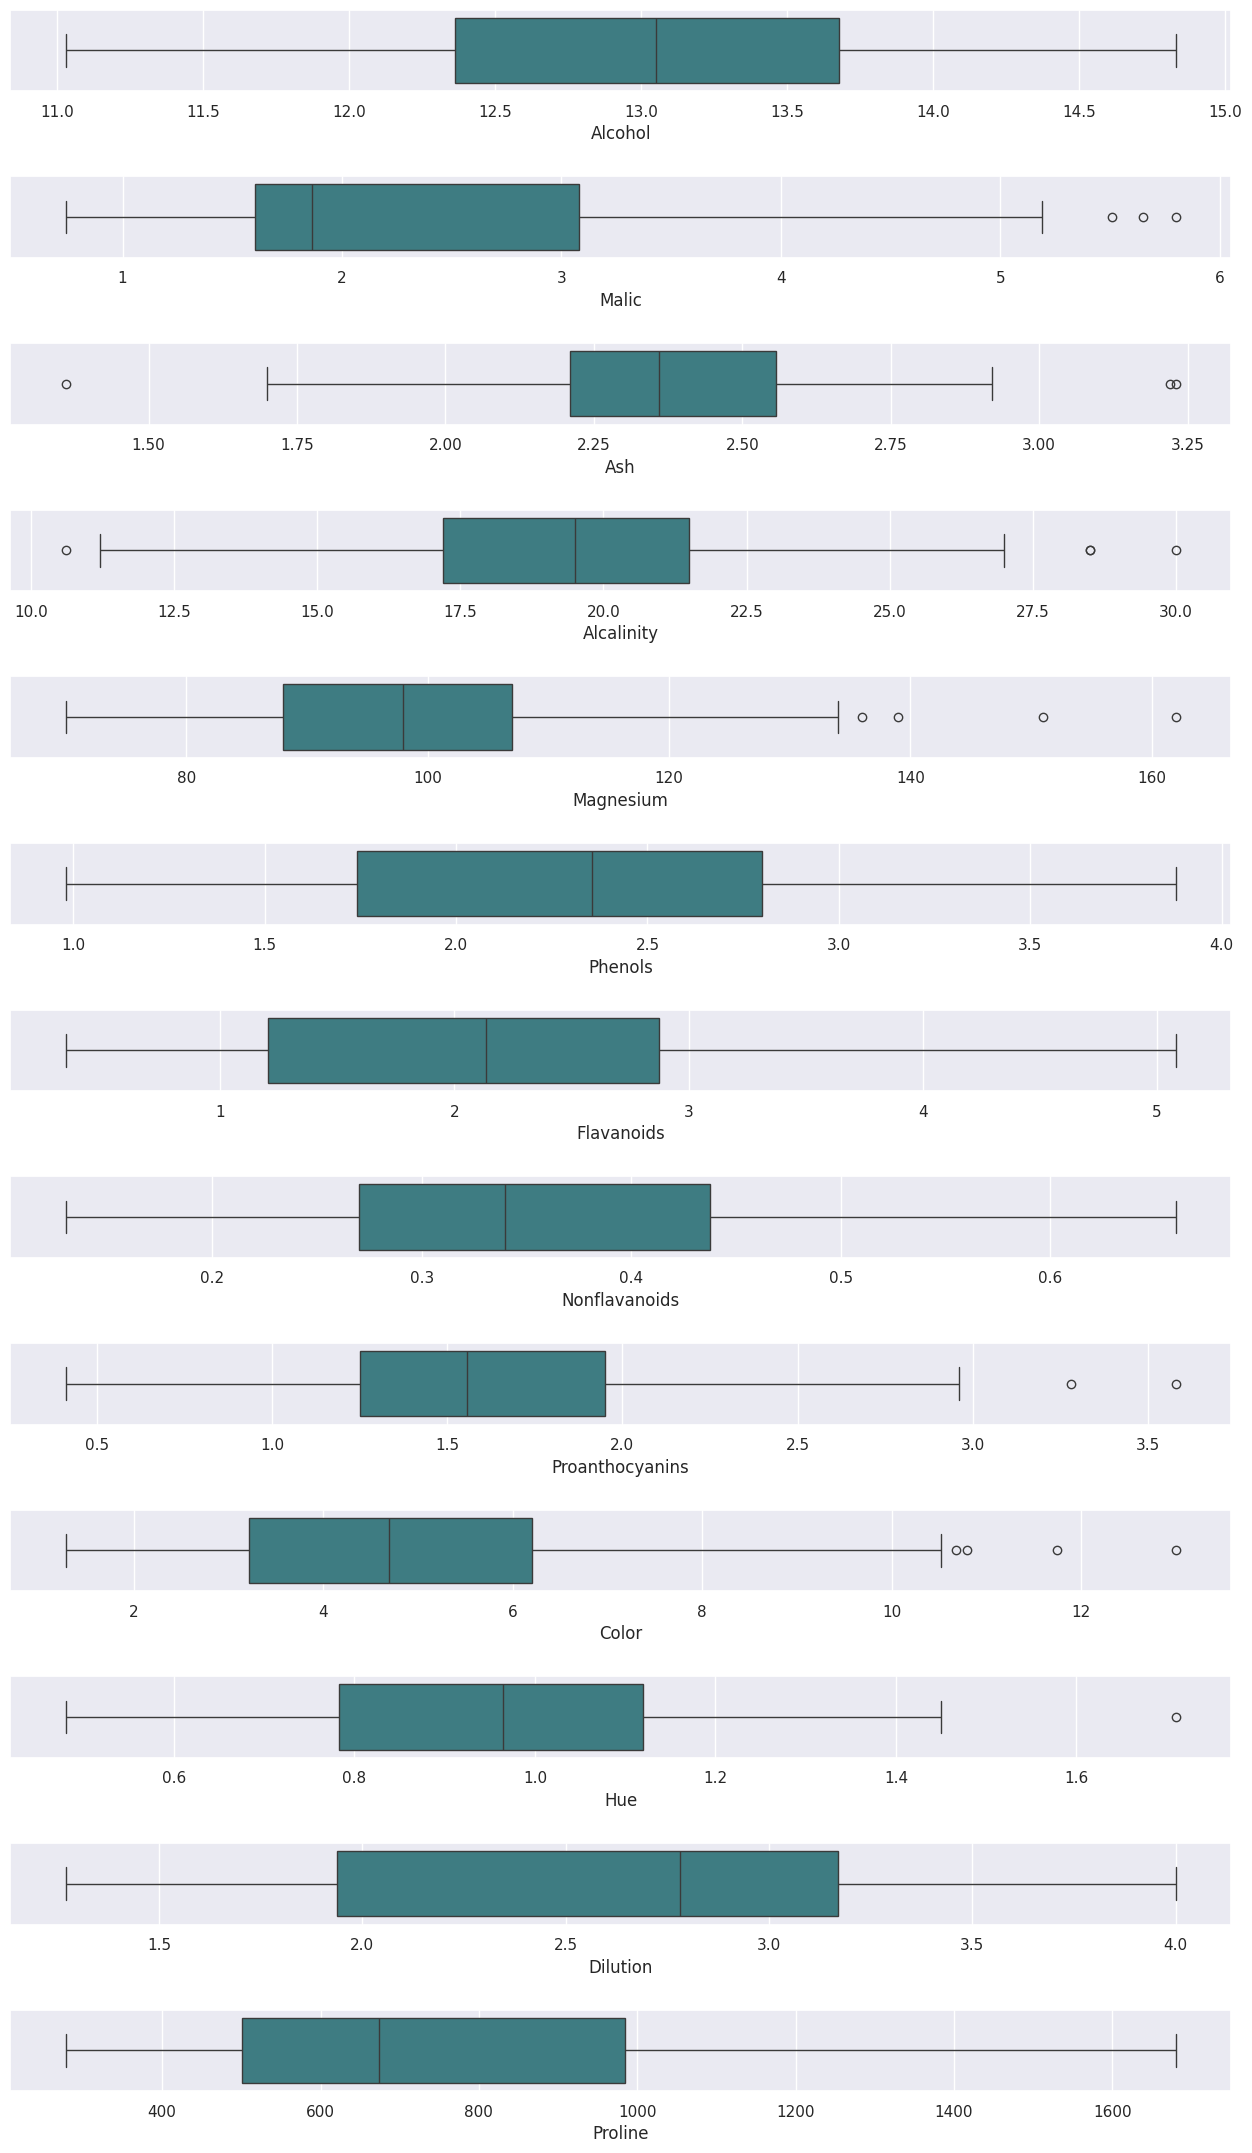

In [113]:
outlier = wine_data.copy()
fig, axes=plt.subplots(13,1, figsize=(13,22),sharex=False,sharey=False)
sns.boxplot(x='Alcohol',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='Malic',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='Ash',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='Alcalinity',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='Magnesium',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='Phenols',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='Flavanoids',data=outlier,palette='crest',ax=axes[6])
sns.boxplot(x='Nonflavanoids',data=outlier,palette='crest',ax=axes[7])
sns.boxplot(x='Proanthocyanins',data=outlier,palette='crest',ax=axes[8])
sns.boxplot(x='Color',data=outlier,palette='crest',ax=axes[9])
sns.boxplot(x='Hue',data=outlier,palette='crest',ax=axes[10])
sns.boxplot(x='Dilution',data=outlier,palette='crest',ax=axes[11])
sns.boxplot(x='Proline',data=outlier,palette='crest',ax=axes[12])
plt.tight_layout(pad=2.0)

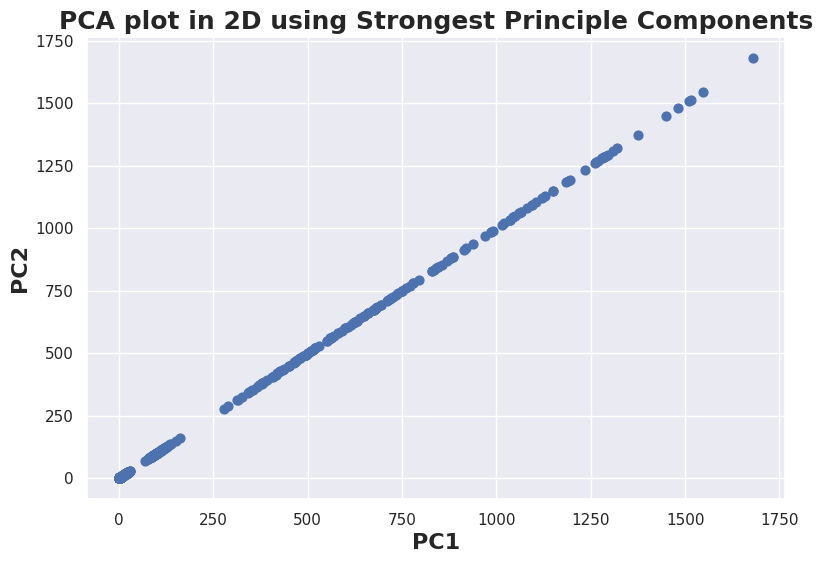

In [114]:
plt.figure(figsize=(9,6))

# Scatterplot
plt.scatter(wine_data.iloc[:,1:],wine_data.iloc[:,1:], s=40)

# Aesthetics
plt.title('PCA plot in 2D using Strongest Principle Components',fontweight='bold',fontsize=18)
plt.xlabel('PC1',fontweight='bold', fontsize=16)
plt.ylabel('PC2',fontweight='bold', fontsize=16)
plt.show()